<a href="https://colab.research.google.com/github/jeongminia/Cancer-Classification/blob/main/weekly/week5/1007_RidgeClassifier_jm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 암환자 유전체 데이터 기반 암종 분류 AI 모델 개발



# library loading

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.metrics import f1_score

# macro f1 score 함수
def macro_f1_score(y_true, y_pred, n_classes = 26):
    f1_scores = []
    for c in range(n_classes):
        y_true_c = (y_true == c)
        y_pred_c = (y_pred == c)
        f1_c = f1_score(y_true_c, y_pred_c)
        f1_scores.append(f1_c)
    return np.mean(f1_scores)

In [3]:
!git clone https://github.com/jeongminia/Cancer-Classification.git

Cloning into 'Cancer-Classification'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 220 (delta 49), reused 29 (delta 29), pack-reused 156 (from 1)
Receiving objects: 100% (220/220), 11.96 MiB | 5.68 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (27/27), done.


In [4]:
!unzip -qq '/content/Cancer-Classification/data/open.zip'

In [5]:
!unzip -qq '/content/Cancer-Classification/data/preprocessed_data.zip'

# data loading

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [38]:
train.tail(5)

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6200,TRAIN_6200,SKCM,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [39]:
test.head(5)

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,R587Q,WT,WT,WT,...,WT,WT,WT,WT,WT,I383Sfs,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [40]:
len(train), len(test)

(6201, 2546)

# preprocessing

1. 결측값 처리
2. 아미노산 변이 치환
  - WT(정상)
  - missense ← 알파벳숫자**알파벳** (치환)
  - insertion ← **-**숫자알파벳 or 알파벳숫자**ins** (삽입)
  - deletion ← 알파벳숫자**del** (삭제)
  - delins ← 알파벳숫자**delins**알파벳 (집단치환)
  - frameshift ← 알파벳숫자**fs**
  - nonsense ← 알파벳숫자 * (조기종결)

  2.1. category1
  
  2.2. category2

  2.3. category3

3. column WT 차원축소
4. 파생변수 생성 mutation_cnt
5. Custom Numeric Encoding
6. Subclass_encoding

### 결측값 처리

In [ ]:
# NaN 개수와 위치 확인
train_nan = train.isna().sum().sum()
train_nan_columns = train.columns[train.isna().any()].tolist()
print(f"train NaN 개수: {train_nan}")
print("NaN 값이 있는 열:")
print(train_nan_columns)

test_nan = test.isna().sum().sum()
test_nan_columns = test.columns[test.isna().any()].tolist()
print(f"test NaN 개수: {test_nan}")
print("NaN 값이 있는 열:")
print(test_nan_columns)

train NaN 개수: 0
NaN 값이 있는 열:
[]
test NaN 개수: 237
NaN 값이 있는 열:
['AK2', 'ATP6V1H', 'CCRL2', 'CFP', 'CNOT2', 'CRAT', 'DPYSL4', 'GUK1', 'IER3', 'INHBB', 'KCNH1', 'MYL1', 'NDUFV1', 'NUDT4', 'POLD2', 'PTCH1', 'PTGES3', 'RBM5', 'SCAMP1', 'SCNN1A', 'SLC25A28', 'SYBU', 'TARS1', 'TMEM97', 'TNFAIP6']


In [ ]:
# NaN 값을 'WT'로 치환
train.fillna('WT', inplace=True)
test.fillna('WT', inplace=True)

print()

train_nan = train.isna().sum().sum()
print(f"처리 후 train NaN 개수: {train_nan}")

test_nan = test.isna().sum().sum()
print(f"처리 후 test NaN 개수: {test_nan}")


처리 후 train NaN 개수: 0
처리 후 test NaN 개수: 0


### 아미노산 변이 치환

#### 1. category1

In [ ]:
def process_value1(value):
    # 1) WT 그대로 유지
    if value == 'WT':
        return value

    parts = value.split()
    processed_parts = []

    for part in parts:
        # 패턴: 문자 그룹 + 숫자 + 문자 그룹
        match = re.match(r'^([A-Za-z*-]*)\d+([A-Za-z*-]*)$', part)

        if match:
            prefix = match.group(1)  # 숫자 앞의 문자 그룹
            suffix = match.group(2)   # 숫자 뒤의 문자 그룹

            # 1. 숫자 앞뒤의 문자 그룹이 같으면 WT로 치환
            if prefix.isupper() and suffix.isupper() and prefix == suffix:
                continue

            # 2. 앞뒤 문자 그룹이 다르면 missense로 분류
            elif prefix.isupper() and suffix.isupper() and prefix != suffix:
                processed_parts.append('missense')

            # 3. 뒤의 문자 그룹에 '*'이 들어가면 nonsense로 치환
            elif '*' in suffix:
                processed_parts.append('nonsense')

            # 4. 뒤의 문자 그룹에 'fs'가 들어가면 frameshift로 치환
            elif 'fs' in suffix:
                processed_parts.append('frameshift')

            # 5. 뒤에 문자 그룹에 'del'이 들어가면 deletion으로 치환
            elif 'delins' in suffix:
                processed_parts.append('delins')

            # 5. 뒤에 문자 그룹에 'del'이 들어가면 deletion으로 치환
            elif 'del' in suffix:
                processed_parts.append('deletion')

            # 5. 뒤에 문자 그룹에 'del'이 들어가면 deletion으로 치환
            elif 'ins' in suffix:
                processed_parts.append('insertion')

            # 6. 뒤에 문자그룹이 없으면 deletion으로 치환
            elif not(suffix):
                processed_parts.append('deletion')

            else:
                print(part)

        # 해당 카테고리가 아니면 그대로 유지
        else:
          processed_parts.append(part)

    # 처리된 부분이 없으면 WT로 변경
    result = 'WT' if not processed_parts else ' '.join(processed_parts)

    return result

In [ ]:
# train 데이터프레임 전처리
for col in train.columns[2:]:  # ID와 SUBCLASS 제외
    train[col] = train[col].apply(process_value1)

train

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,missense,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [ ]:
# test 데이터프레임 전처리
for col in test.columns[1:]:  # ID 제외
    test[col] = test[col].apply(process_value1)

test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,missense,WT,WT,WT,...,WT,WT,WT,WT,WT,frameshift,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,missense,WT,missense,missense,...,frameshift frameshift,missense,WT,WT,WT,WT,missense missense,missense,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,missense,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


#### 2. category2



In [ ]:
def process_value2(value):
    # 1) WT 그대로 유지
    if value == 'WT':
        return value

    parts = value.split()
    processed_parts = []

    for part in parts:
        # 패턴: 숫자_숫자 + 변이정보
        match = re.match(r'^\d+_\d+([A-Za-z*-]+>[A-Za-z*-]+|del)$', part)

        if match:
            variant = match.group(1)  # 변이 정보 그룹


            # 1. >가 있는 경우
            if '>' in variant:
                before, after = variant.split('>')  # '>' 기준으로 나눔
                # 1.1 문자 그룹이 같은 경우 -> WT
                if before.isupper() and after.isupper() and before == after:
                    continue
                # 1.2 문자 그룹이 다른 경우 -> missense
                elif before.isupper() and after.isupper() and before != after:
                    processed_parts.append('missense')
                # 1.3 *가 있는 경우 -> nonsense
                elif '*' in after:
                    processed_parts.append('nonsense')
                # 1.4 fs가 있는 경우 -> frameshift
                elif 'fs' in after:
                    processed_parts.append('frameshift')
                else:
                    print(part)

            # 2. >가 없는 경우
            elif 'del' in variant:
                processed_parts.append('deletion')

            else:
                print(part)

        # 해당 카테고리가 아니면 그대로 유지
        else:
          processed_parts.append(part)


    # 처리된 부분이 없으면 WT로 변경
    result = 'WT' if not processed_parts else ' '.join(processed_parts)

    return result

In [ ]:
# train 데이터프레임 전처리
for col in train.columns[2:]:  # ID와 SUBCLASS 제외
    train[col] = train[col].apply(process_value2)

train

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,missense,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [ ]:
# test 데이터프레임 전처리
for col in test.columns[1:]:  # ID 제외
    test[col] = test[col].apply(process_value2)

# 최종 데이터 확인
test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,missense,WT,WT,WT,...,WT,WT,WT,WT,WT,frameshift,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,missense,WT,missense,missense,...,frameshift frameshift,missense,WT,WT,WT,WT,missense missense,missense,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,missense,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


#### 3. category3

In [ ]:
def process_value3(value):
    # 1) WT 그대로 유지
    if value == 'WT':
        return value

    parts = value.split()
    processed_parts = []

    for part in parts:
        # 패턴: 숫자_숫자 + 변이정보
        match = re.match(r'^([A-Za-z]+)\d+_([A-Za-z]+)?\d+([A-Za-z]+)$', part)

        if match:
            variant = match.group(3)  # 변이 정보 그룹

            # 1. >가 있는 경우
            if 'del' in variant and 'ins' in variant:
                processed_parts.append('delins')

            elif 'del' in variant and not('ins' in variant):
                processed_parts.append('deletion')

            elif 'ins' in variant and not('del' in variant):
                processed_parts.append('insertion')

            else:
                print(part)

        # 해당 카테고리가 아니면 그대로 유지
        else:
          processed_parts.append(part)

    # 처리된 부분이 없으면 WT로 변경
    result = 'WT' if not processed_parts else ' '.join(processed_parts)

    return result

In [ ]:
# train 데이터프레임 전처리
for col in train.columns[2:]:  # ID와 SUBCLASS 제외
    train[col] = train[col].apply(process_value3)

# 최종 데이터 확인
train

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,missense,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [ ]:
# test 데이터프레임 전처리
for col in test.columns[1:]:  # ID 제외
    test[col] = test[col].apply(process_value3)

# 최종 데이터 확인
test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,missense,WT,WT,WT,...,WT,WT,WT,WT,WT,frameshift,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,missense,WT,missense,missense,...,frameshift frameshift,missense,WT,WT,WT,WT,missense missense,missense,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,missense,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


### column WT 차원축소
- WT로만 구성된 컬럼 삭제

In [ ]:
train_wt_columns = train.columns[(train == 'WT').all()].tolist()
test_wt_columns = test.columns[(test == 'WT').all()].tolist()

print('데이터셋에서 값이 모두 WT인 열 개수')
print('trainSet: ', len(train_wt_columns))
print('testSet: ', len(test_wt_columns))

데이터셋에서 값이 모두 WT인 열 개수
trainSet:  159
testSet:  29


In [ ]:
cnt = 0
both_wt_columns = []
for gene in train_wt_columns:
  if gene in test_wt_columns:
    both_wt_columns.append(gene)
    cnt += 1

print('두 데이터셋에서 값이 모두 WT인 열 개수:', cnt)
both_wt_columns

두 데이터셋에서 값이 모두 WT인 열 개수: 21


['BOLA2',
 'CROCCP2',
 'EEIG1',
 'G6PC1',
 'GPX4',
 'H2AC25',
 'HBBP1',
 'HYCC2',
 'MIX23',
 'MYL11',
 'NHERF1',
 'NHERF4',
 'PALS1',
 'PHB1',
 'PTTG3P',
 'PVT1',
 'RIGI',
 'SELENOP',
 'SELENOW',
 'SKIC3',
 'XIST']

In [ ]:
train_df = train.drop(columns=both_wt_columns)
test_df = test.drop(columns=both_wt_columns)

### mutation_cnt 파생변수 생성

In [ ]:
# 변이 횟수를 계산하는 함수 정의
def count_mutations(row):
    mutation_count = 0
    for val in row:
        # 값을 문자열로 변환하여 처리
        val = str(val)
        if val != 'WT':
            # 공백으로 나누어진 패턴 개수를 모두 더하기
            mutation_count += len(val.split())
    return mutation_count

In [ ]:
# 각 ID별로 변이 횟수 측정하여 새로운 열 추가
train['mutation_cnt'] = train.iloc[:, 2:].apply(count_mutations, axis=1)

# 최종 데이터 확인
train

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,mutation_cnt
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,18
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,12
2,TRAIN_0002,SKCM,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,85
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,4
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,33
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,8
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,missense,WT,13
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,5


In [ ]:
# 각 ID별로 변이 횟수 측정하여 새로운 열 추가
test['mutation_cnt'] = test.iloc[:, 1:].apply(count_mutations, axis=1)

# 최종 데이터 확인
test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,mutation_cnt
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,81
1,TEST_0001,WT,WT,WT,WT,WT,missense,WT,WT,WT,...,WT,WT,WT,WT,frameshift,WT,WT,WT,WT,523
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,5
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,6
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,90
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,11
2543,TEST_2543,WT,WT,WT,WT,WT,missense,WT,missense,missense,...,missense,WT,WT,WT,WT,missense missense,missense,WT,WT,2231
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,missense,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,4


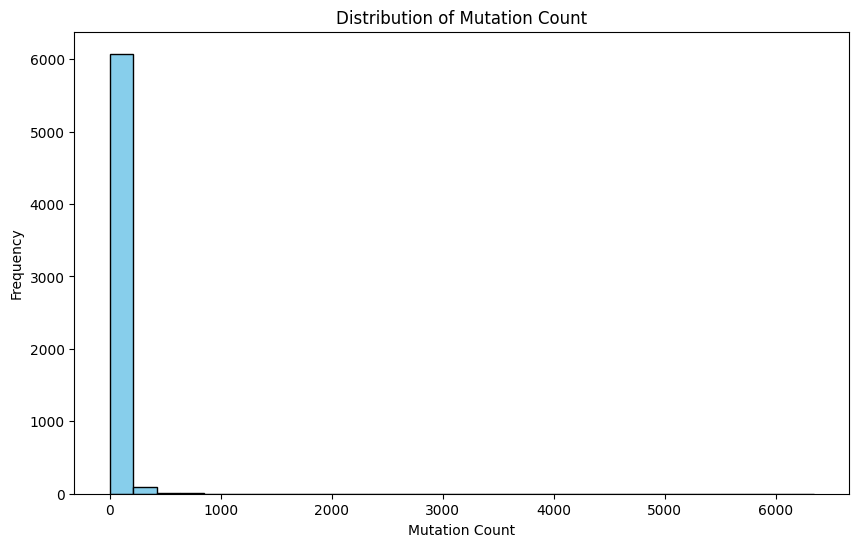

In [ ]:
import matplotlib.pyplot as plt

# mutation_count 분포를 막대그래프로 시각화
plt.figure(figsize=(10, 6))
train['mutation_cnt'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')

# 그래프 제목 및 라벨 설정
plt.title('Distribution of Mutation Count')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

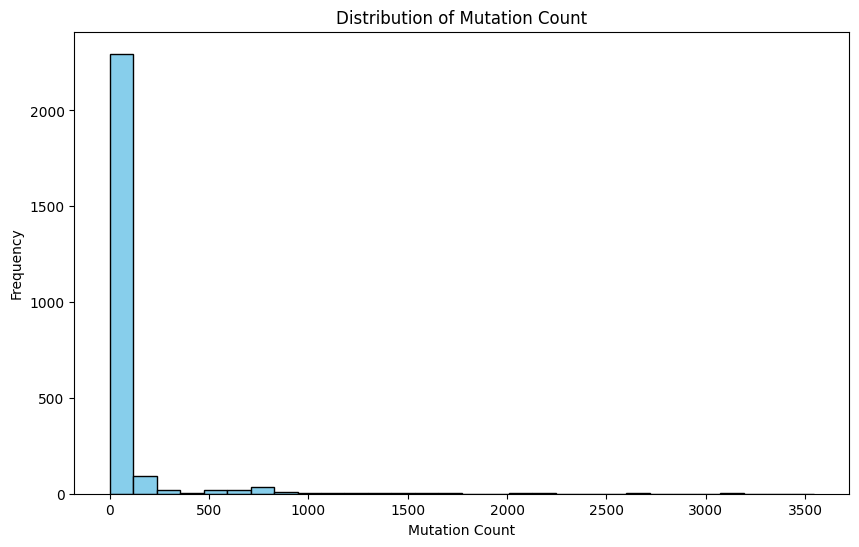

In [ ]:
import matplotlib.pyplot as plt

# mutation_count 분포를 막대그래프로 시각화
plt.figure(figsize=(10, 6))
test['mutation_cnt'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')

# 그래프 제목 및 라벨 설정
plt.title('Distribution of Mutation Count')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

In [ ]:
# SUBCLASS별 mutation_count의 평균 계산
train_mutation_count = pd.DataFrame(train.groupby('SUBCLASS')['mutation_cnt'].mean())
train_mutation_count.sort_values(by='mutation_cnt', ascending=True)

,mutation_cnt
SUBCLASS,
LAML,2.563291
PCPG,3.428571
THCA,3.435185
THYM,3.693878
PRAD,6.030075
LGG,7.109170
GBMLGG,9.904555
SARC,10.358586
KIRC,10.491018


### Custom Numeric Encoding (opt)

Nonsense > Frameshift > Delins > Deletion > Insertion > Missense > WT

In [ ]:
# 변이 유형에 대한 지수 값 정의
mutation_dict = {
    'WT': 10**0,
    'missense': 10**1,
    'insertion': 10**2,
    'deletion': 10**3,
    'delins': 10**4,
    'frameshift': 10**5,
    'nonsense': 10**6
}

# 변이 값을 합산하는 함수 정의
def mutation_to_numeric(value):
    # 문자열인지 확인
    if isinstance(value, str):
        # 공백만 있는 경우 처리
        if value.strip() == '':
            print("value.strip() doesn't work: ", value)
            return 0

        # 공백을 기준으로 변이 분리
        mutations = value.split()  # 공백을 기준으로 분리
        total_value = 0  # 합산 값 초기화

        # 각 변이 유형에 대해 반복
        for m in mutations:
            m = m.strip()  # 공백 제거
            if m in mutation_dict:
                total_value += mutation_dict[m]  # 사전에서 값을 찾아서 더함
         #   else:
         #       print(f"Unknown mutation type: {m}")  # 알 수 없는 변이 유형에 대해 출력

       # if total_value > 1:
       #     print(f"Total value for {value}: {total_value}\n")  # 디버깅 메시지

        return total_value
    else:
        print(value)
        return value  # 숫자나 다른 형식일 경우 그대로 반환


In [ ]:
# 함수 적용
for col in train.columns[2:]:  # ID 제외
    train[col] = train[col].apply(mutation_to_numeric)

In [ ]:
# 함수 적용
for col in test.columns[1:]:  # ID 제외
    test[col] = test[col].apply(mutation_to_numeric)

### Subclass_encoding (opt)

SUBCLASS
BRCA      786
KIPAN     515
GBMLGG    461
STES      379
KIRC      334
THCA      324
SKCM      276
PRAD      266
OV        253
LGG       229
HNSC      223
COAD      223
UCEC      198
SARC      198
LUAD      184
LUSC      178
LIHC      158
LAML      158
CESC      155
PCPG      147
TGCT      124
PAAD      120
BLCA      104
THYM       98
ACC        72
DLBC       38
Name: count, dtype: int64


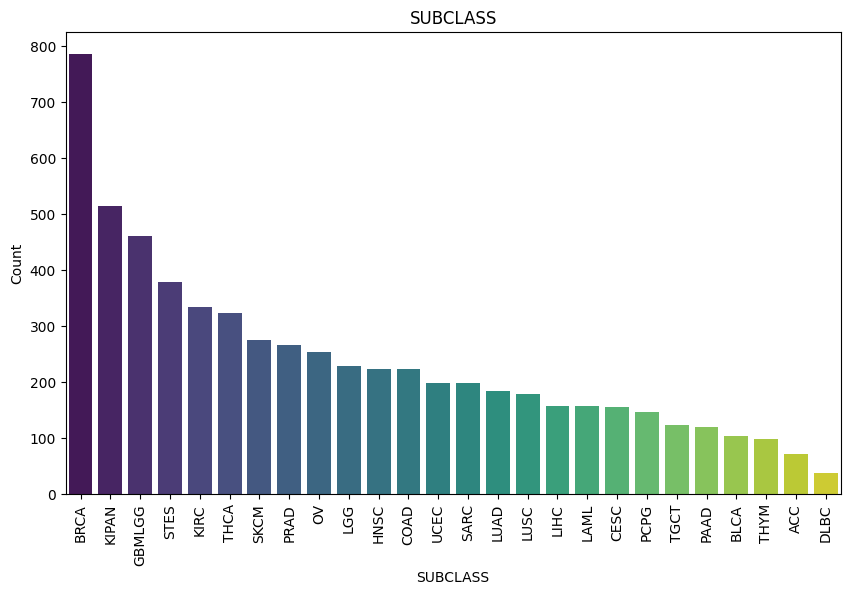

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# SUBCLASS 컬럼의 값 분포를 세는 코드
subclass_counts = train['SUBCLASS'].value_counts()

# 분포 출력
print(subclass_counts)

# 분포를 시각화하는 코드 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(x=subclass_counts.index, y=subclass_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('SUBCLASS')
plt.xlabel('SUBCLASS')
plt.ylabel('Count')
plt.show()

#### LabelEncoder

In [42]:
# SUBCLASS 가 범주형이기 때문에 LabelEncoder 사용
le_subclass = LabelEncoder()
train['SUBCLASS'] = le_subclass.fit_transform(train['SUBCLASS'])

# 변환된 레이블 확인
for i, label in enumerate(le_subclass.classes_):
    print(f"원래 레이블: {label}, 변환된 숫자: {i}")

원래 레이블: ACC, 변환된 숫자: 0
원래 레이블: BLCA, 변환된 숫자: 1
원래 레이블: BRCA, 변환된 숫자: 2
원래 레이블: CESC, 변환된 숫자: 3
원래 레이블: COAD, 변환된 숫자: 4
원래 레이블: DLBC, 변환된 숫자: 5
원래 레이블: GBMLGG, 변환된 숫자: 6
원래 레이블: HNSC, 변환된 숫자: 7
원래 레이블: KIPAN, 변환된 숫자: 8
원래 레이블: KIRC, 변환된 숫자: 9
원래 레이블: LAML, 변환된 숫자: 10
원래 레이블: LGG, 변환된 숫자: 11
원래 레이블: LIHC, 변환된 숫자: 12
원래 레이블: LUAD, 변환된 숫자: 13
원래 레이블: LUSC, 변환된 숫자: 14
원래 레이블: OV, 변환된 숫자: 15
원래 레이블: PAAD, 변환된 숫자: 16
원래 레이블: PCPG, 변환된 숫자: 17
원래 레이블: PRAD, 변환된 숫자: 18
원래 레이블: SARC, 변환된 숫자: 19
원래 레이블: SKCM, 변환된 숫자: 20
원래 레이블: STES, 변환된 숫자: 21
원래 레이블: TGCT, 변환된 숫자: 22
원래 레이블: THCA, 변환된 숫자: 23
원래 레이블: THYM, 변환된 숫자: 24
원래 레이블: UCEC, 변환된 숫자: 25


# Model - CatBoost

In [11]:
train_df = pd.read_csv('preprocessed_train.csv', index_col=None)
train_df = train_df.drop(columns=['Unnamed: 0'])
test_df = pd.read_csv('preprocessed_test.csv', index_col=None)
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train_df.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,mutation_cnt
0,TRAIN_0000,8,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,18
1,TRAIN_0001,19,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,12
2,TRAIN_0002,20,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,85
3,TRAIN_0003,9,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
4,TRAIN_0004,6,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,23


In [12]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['SUBCLASS', 'ID'])
y_subclass = train_df['SUBCLASS']

#categorical_columns = X.select_dtypes(include=['object', 'category']).columns
#ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#X_encoded = X.copy()
#X_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_train, X_valid, y_train, y_valid = train_test_split(X, y_subclass, test_size=0.2, random_state=42)

In [16]:
from imblearn.under_sampling import TomekLinks

# Tomek Links 적용
tl = TomekLinks()
X_train, y_train = tl.fit_resample(X_train, y_train)

In [17]:
X_train

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,mutation_cnt
0,1,10,1,1,1,1,1,1,1,1,...,1,1,1,1,1,10,1,1,1,224
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,34
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,12
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,43
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4662,1,1,1,1,1,1,1,1,20,1,...,1,1,1,10,1,1,1,1,1,116
4663,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5
4664,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,11


## 모델 학습

In [14]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [18]:
# 필요한 라이브러리 임포트
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Pool 객체 생성 (카테고리형 변수 지정)
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

params = {'learning_rate': 0.8, 'depth': 10,
          'boosting_type': 'Plain',
          'iterations': 5000,
          'task_type': 'GPU',
          'max_bin': 20000
          }

model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=1000, use_best_model=True)

print("Training session is done! *^^*")

0:	learn: 2.3335811	test: 2.4833170	best: 2.4833170 (0)	total: 448ms	remaining: 37m 20s
1:	learn: 2.1489764	test: 2.3418870	best: 2.3418870 (1)	total: 762ms	remaining: 31m 43s
2:	learn: 2.0295304	test: 2.2202546	best: 2.2202546 (2)	total: 973ms	remaining: 27m 1s
3:	learn: 1.9770154	test: 2.1904187	best: 2.1904187 (3)	total: 1.24s	remaining: 25m 44s
4:	learn: 1.9399592	test: 2.1742224	best: 2.1742224 (4)	total: 1.52s	remaining: 25m 15s
5:	learn: 1.8991144	test: 2.1507180	best: 2.1507180 (5)	total: 1.74s	remaining: 24m 6s
6:	learn: 1.8832629	test: 2.1449001	best: 2.1449001 (6)	total: 1.96s	remaining: 23m 16s
7:	learn: 1.8461883	test: 2.1204512	best: 2.1204512 (7)	total: 2.23s	remaining: 23m 10s
8:	learn: 1.8298159	test: 2.1116130	best: 2.1116130 (8)	total: 2.41s	remaining: 22m 16s
9:	learn: 1.8125488	test: 2.1067327	best: 2.1067327 (9)	total: 2.62s	remaining: 21m 49s
10:	learn: 1.7980818	test: 2.1032536	best: 2.1032536 (10)	total: 2.83s	remaining: 21m 25s
11:	learn: 1.7890868	test: 2.099

In [27]:
# 테스트 데이터로 예측
y_pred = model.predict(X_valid)

# Macro F1 score 계산
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print(f"CatBoost Macro F1 Score: {macro_f1:.2f}")

XGBoost Macro F1 Score: 0.39


In [23]:
feature_importances = model.get_feature_importance()

# Feature Importance를 데이터프레임으로 변환
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Feature Importance 출력
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
4384,mutation_cnt,35.794951
4107,TP53,13.766947
2977,PIK3CA,8.551984
474,BRAF,7.481023
3223,PTEN,6.442585
...,...,...
1744,HCLS1,0.000000
1746,HDAC11,0.000000
1750,HDAC6,0.000000
1751,HDAC9,0.000000


In [28]:
print(len(importance_df), len(importance_df[importance_df.Importance > 0.0]['Feature']))

4385 1507


## 주요 피쳐로 재학습

In [29]:
X_encoded2 = X[list(importance_df[importance_df.Importance > 0.00]['Feature'])]

X_train, X_valid, y_train, y_valid = train_test_split(X_encoded2, y_subclass, test_size=0.2, random_state=42)
X_train, y_train = tl.fit_resample(X_train, y_train) # 클래스 불균형 해소

In [30]:
# Ridge Classifier 모델 생성
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

params = {'learning_rate': 0.8, 'depth': 10,
          'boosting_type': 'Plain',
          'iterations': 5000,
          'task_type': 'GPU',
          'max_bin': 20000
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=1000, use_best_model=True)

print("Training session is done! *^^*")

0:	learn: 2.2805711	test: 2.3850043	best: 2.3850043 (0)	total: 312ms	remaining: 25m 57s
1:	learn: 2.1168966	test: 2.2461453	best: 2.2461453 (1)	total: 463ms	remaining: 19m 18s
2:	learn: 2.0199358	test: 2.1874186	best: 2.1874186 (2)	total: 621ms	remaining: 17m 14s
3:	learn: 1.9724893	test: 2.1557062	best: 2.1557062 (3)	total: 756ms	remaining: 15m 44s
4:	learn: 1.9334951	test: 2.1331837	best: 2.1331837 (4)	total: 891ms	remaining: 14m 50s
5:	learn: 1.8930307	test: 2.1096323	best: 2.1096323 (5)	total: 1.02s	remaining: 14m 9s
6:	learn: 1.8744762	test: 2.1015533	best: 2.1015533 (6)	total: 1.13s	remaining: 13m 24s
7:	learn: 1.8423672	test: 2.0843188	best: 2.0843188 (7)	total: 1.27s	remaining: 13m 10s
8:	learn: 1.8074192	test: 2.0637130	best: 2.0637130 (8)	total: 1.38s	remaining: 12m 45s
9:	learn: 1.7903270	test: 2.0557479	best: 2.0557479 (9)	total: 1.48s	remaining: 12m 16s
10:	learn: 1.7785568	test: 2.0532164	best: 2.0532164 (10)	total: 1.58s	remaining: 11m 58s
11:	learn: 1.7650388	test: 2.04

In [31]:
# 테스트 데이터로 예측
y_pred = cat_model.predict(X_valid)

# Macro F1 score 계산
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print(f"CatBoost Macro F1 Score: {macro_f1:.2f}")

CatBoost Macro F1 Score: 0.38


In [34]:
X_test = test_df.drop(columns=['ID'])
X_test = X_test[list(importance_df[importance_df.Importance > 0.0].Feature)]

predictions = cat_model.predict(X_test)
#original_labels = le_subclass.inverse_transform(predictions)

In [43]:
predictions = cat_model.predict(X_test)
original_labels = le_subclass.inverse_transform(predictions)

submission["SUBCLASS"] = original_labels
submission.to_csv('./CatBoost_submission.csv', encoding='UTF-8-sig', index=False)